# PUCPR – PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ
## CURSO: BIG DATA E INTELIGÊNCIA ANALÍTICA
### MATÉRIA: TÉCNICA EM GRAPH MINING
- PROFESSOR: GALBAS MILLEO FILHO
- ALUNOS: JUAN MANOEL MARINHO NASCIMENTO & GUSTAVO DA SILVA ROSSI
- LINKEDIN: https://www.linkedin.com/in/sr-marinho/  https://www.linkedin.com/in/gustavo-da-silva-rossi-006586127/

### Descritivo

Game of Thrones é uma das séries de TV mais populares dos últimos tempos baseada em uma coleção de livros chamada As Crônicas de Gelo e Fogo, de George R. R. Martin. A série possui 8 temporadas que cobrem os 5 volumes da coleção de livros.
Com base nos roteiros da série, foi construída uma rede complexa que representa as relações de interação entre os personagens a partir de vértices e arestas. Nesta rede, é estabelecida uma conexão entre o Personagem A e o Personagem B
nas seguintes situações:

- 1. Personagem A fala após o Personagem B;
- 2. Personagem A fala sobre o Personagem B;
- 3. Personagem C fala sobre o Personagem A e Personagem B;
- 4. Personagem A e o Personagem B aparecem juntos em uma mesma cena.

### Explicação

Considerando as relações apresentadas acima, os arquivos "got-s1-edges.csv" e "got-s8-edges.csv" apresentam a lista de
arestas estabelecidas entre os personagens durante todos os episódios da primeira e da oitava temporada da série,
respectivamente. Cada arquivo possui 3 colunas, sendo elas: Source (Personagem A), Target (Personagem B) e Weight, que
representa a quantidade de interações entre os personagens a partir do peso das conexões. Por exemplo, na primeira
temporada os personagens NED e ROBERT tiveram um total de 192 interações, enquanto na temporada 8 foram somente 2
interações. Em ambos os casos, os grafos são não direcionados, ou seja, as interações entre o Personagem A e B são as mesmas que entre o Personagem B e A.


* Diante deste contexto, escreva um relatório sucinto comparando a rede da primeira temporada ("got-s1-edges.csv") com a
rede da segunda temporada ("got-s8-edges.csv"). Para isso, realize as seguintes tarefas:
(Tarefa 1) Discuta quais as principais diferenças entre ambas as redes com base na distribuição de graus dos vértices (apresente os gráficos de histograma), grau médio, densidade e transitividade. Para estas
três medidas, apresente os valores obtidos durante a discussão.

In [ ]:
import networkx as nx
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
S1 = pd.read_csv("base/got-s1-edges_semanas7_8 (1).csv", delimiter= ",")
GrafoTemporada1 = nx.from_pandas_edgelist(S1, source="Source", target="Target", edge_attr="Weight")

In [ ]:
S8 = pd.read_csv("base/got-s8-edges_semanas7_8 (1).csv", delimiter= ",")
GrafoTemporada8 = nx.from_pandas_edgelist(S8, source="Source", target="Target", edge_attr="Weight")

<AxesSubplot:>

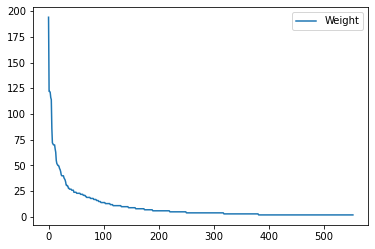

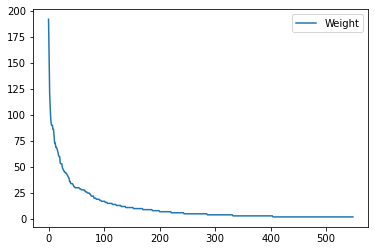

In [4]:
S8.plot()
S1.plot()

In [5]:
print("Grafo S1 (qtde. de vértices)): ", GrafoTemporada1.order())
print("Grafo S8 (qtde. de vértices)): ", GrafoTemporada8.order())
print("Size Grafo S1 (qtde. de arestas)): ", GrafoTemporada1.size())
print("Size Grafo S8 (qtde. de arestas)): ", GrafoTemporada8.size())


Grafo S1 (qtde. de vértices)):  126
Grafo S8 (qtde. de vértices)):  74
Size Grafo S1 (qtde. de arestas)):  549
Size Grafo S8 (qtde. de arestas)):  553


# Graus Primeira Season

In [19]:
def GrausPrimeiraSeason():
    grau = nx.degree_centrality(GrafoTemporada1)
    grau = list(grau.values())
    maior_grau = max(grau)
    maior_grau_idx = grau.index(maior_grau)
    print("Centralidade de Grau {} com {}".format(str(maior_grau_idx), str(maior_grau)))
    
    posicao = nx.draw_kamada_kawai(GrafoTemporada1)#, ax=ax)
    plt.figure(figsize=(15,9))
    nx.draw_networkx(GrafoTemporada1, posicao, with_labels=False, node_size=80, cmap=plt.get_cmap("hsv"), node_color=grau)
    degree_centrality = nx.centrality.degree_centrality(GrafoTemporada1)
    print("Sorted: ",(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8])
    
    plt.figure(figsize=(15,8))
    plt.hist(degree_centrality.values())
    plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.4])
    plt.title('Hist Centralidade de Grau - Primeira Temporada ', fontdict ={'size': 16}, loc='center')
    plt.xlabel('Grau de centralidade', fontdict ={'size': 13})
    plt.ylabel('Count',fontdict ={'size': 13})
    
   

Centralidade de Grau 0 com 0.456
Sorted:  [('NED', 0.456), ('TYRION', 0.328), ('ROBERT', 0.28800000000000003), ('CATELYN', 0.28800000000000003), ('ROBB', 0.24), ('CERSEI', 0.232), ('ARYA', 0.224), ('JOFFREY', 0.216)]


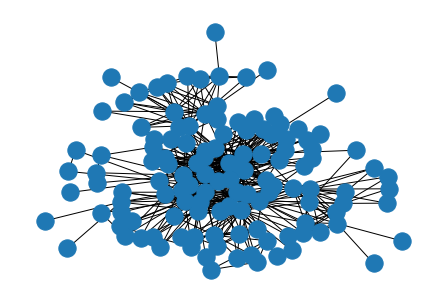

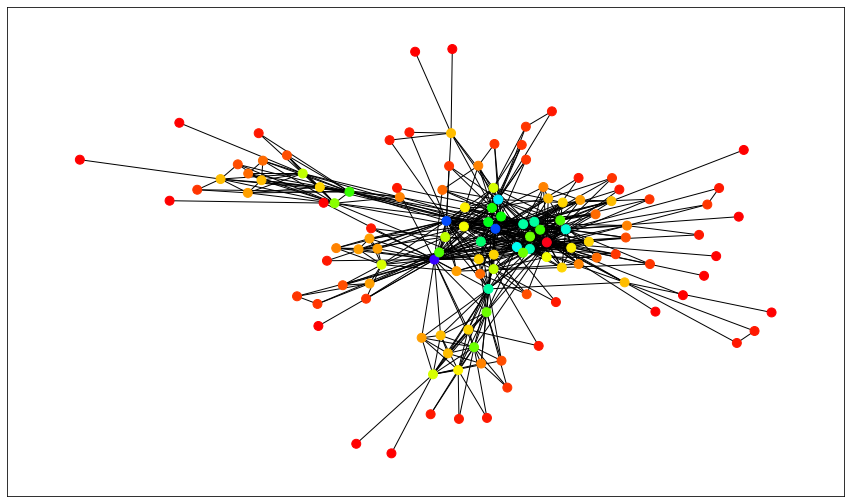

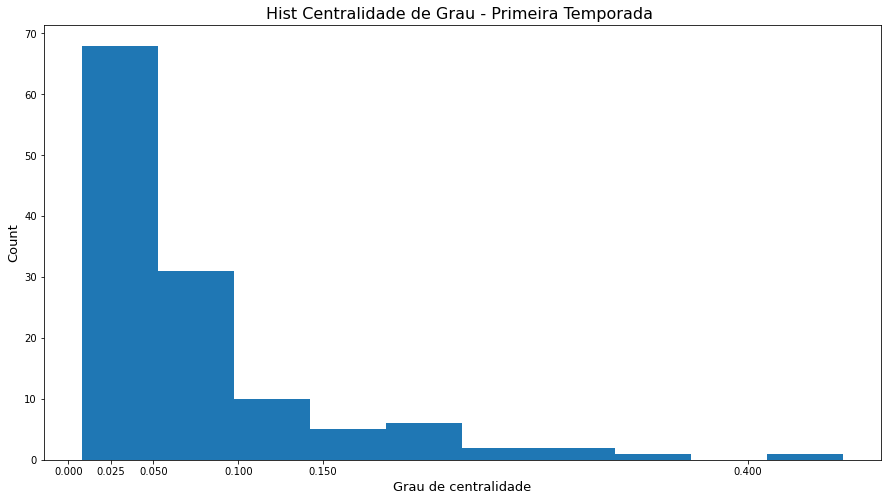

In [20]:
GrausPrimeiraSeason()

# Graus - Oitava temporada


Vértice com maior centralidade de grau é o 10 com 0.5753424657534246


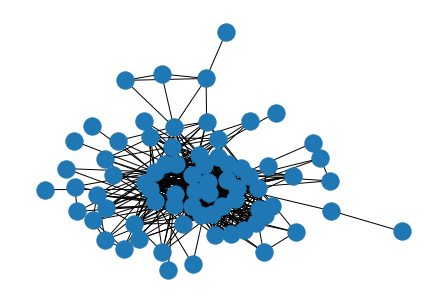

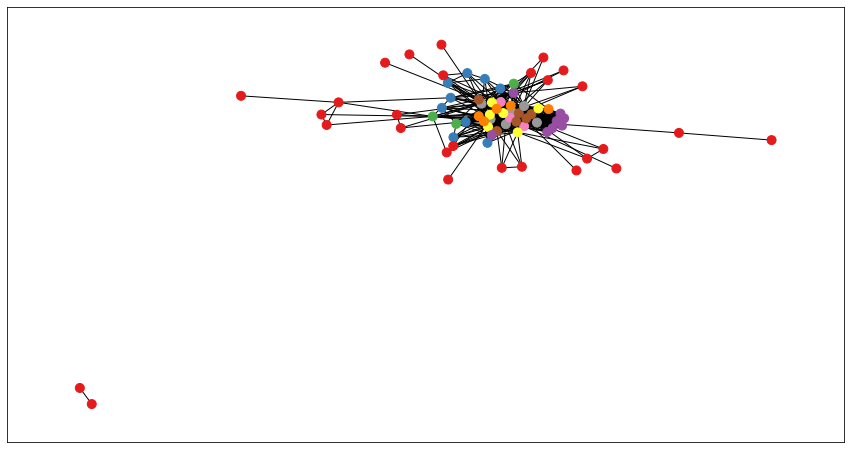

In [22]:
def GrausOitavaTemporada():
    grau8 = nx.degree_centrality(GrafoTemporada8)
    grau8 = list(grau8.values())
    maior_grau8 = max(grau8)
    maior_grau_idx8 = grau8.index(maior_grau8)
    print("Vértice com maior centralidade de grau é o {} com {}".format(str(maior_grau_idx8), str(maior_grau8)))
    posicao8 = nx.draw_kamada_kawai(GrafoTemporada8)
    plt.figure(figsize=(15,8))
    nx.draw_networkx(GrafoTemporada8, posicao8, with_labels=False, node_size=80, cmap=plt.get_cmap("Set1"), node_color=grau8)

GrausOitavaTemporada()

# Centralidade de grau - Oitava temporada
# Personagem com maior grau de centralidade: Sam

[('SAM', 0.5753424657534246), ('DAENERYS', 0.5616438356164384), ('TYRION', 0.5616438356164384), ('SANSA', 0.547945205479452), ('ARYA', 0.5342465753424657), ('GREY_WORM', 0.5205479452054794), ('DAVOS', 0.5068493150684932), ('JON', 0.4931506849315068)]
Visualização de centralidade de grau


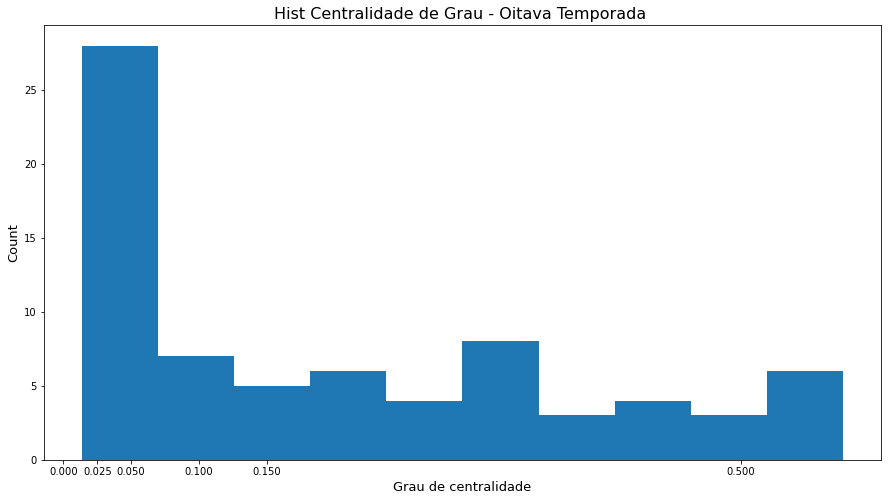

In [23]:
def MaiorGrauCentralidade_Sam():
    degree_centrality8 = nx.centrality.degree_centrality(GrafoTemporada8)
    print((sorted(degree_centrality8.items(), key=lambda item: item[1], reverse=True))[:8])
    print("Visualização de centralidade de grau")
    plt.figure(figsize=(15,8))
    plt.hist(degree_centrality8.values())
    plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.5])
    plt.title('Hist Centralidade de Grau - Oitava Temporada ', fontdict ={'size': 16}, loc='center')
    plt.xlabel('Grau de centralidade', fontdict ={'size': 13})
    plt.ylabel('Count',fontdict ={'size': 13})

MaiorGrauCentralidade_Sam()

# Distribuição em graus - Primeira e oitava temporada


In [24]:
(sorted(GrafoTemporada1.degree, key=lambda item: item[1], reverse=True))[:10]


[('NED', 57),
 ('TYRION', 41),
 ('ROBERT', 36),
 ('CATELYN', 36),
 ('ROBB', 30),
 ('CERSEI', 29),
 ('ARYA', 28),
 ('JOFFREY', 27),
 ('JON', 26),
 ('LITTLEFINGER', 26)]

In [25]:
(sorted(GrafoTemporada8.degree, key=lambda item: item[1], reverse=True))[:10]


[('SAM', 42),
 ('DAENERYS', 41),
 ('TYRION', 41),
 ('SANSA', 40),
 ('ARYA', 39),
 ('GREY_WORM', 38),
 ('DAVOS', 37),
 ('JON', 36),
 ('BRIENNE', 34),
 ('JAIME', 32)]

# Distribuição em graus - primeira temporada e oitava temporada

Distribuição em graus - oitava temporada


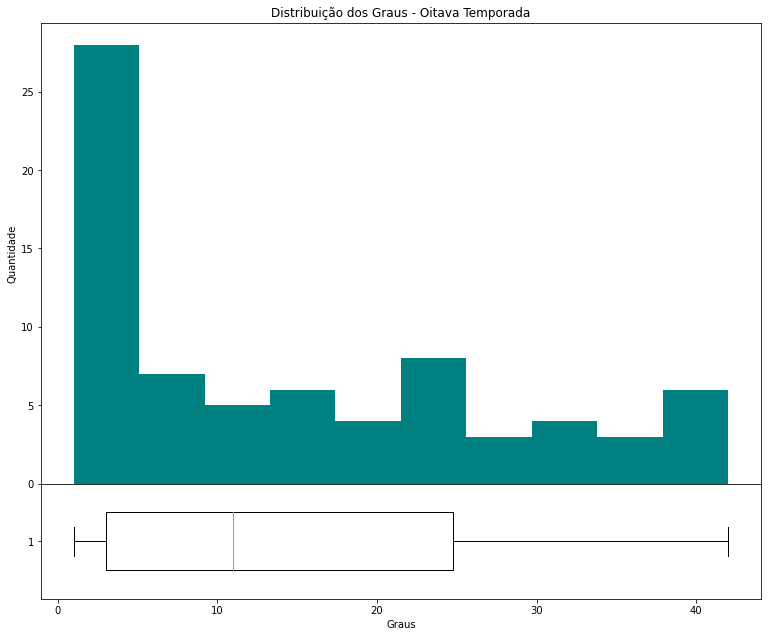

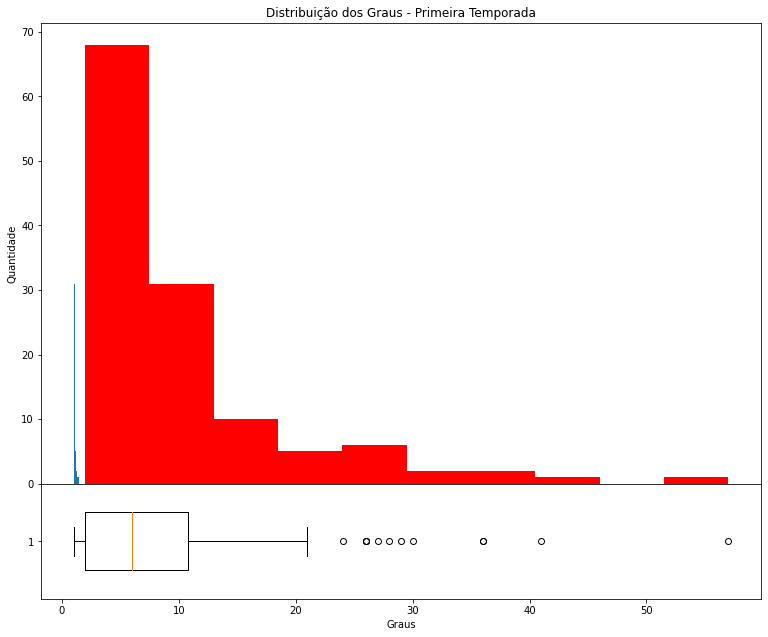

In [30]:
def distribuicao_graus_season_one():
    graus = [grau for vertice, grau in GrafoTemporada1.degree()]
    fig = plt.figure(1, figsize=(10,8))
    ax_hist = plt.axes([0, .2, 1, .8])
    ax_box = plt.axes([0, .0, 1, .2])

    ax_hist.hist(graus, color="r")
    ax_hist.set_title("Distribuição dos Graus - Primeira Temporada")
    ax_hist.set_ylabel("Quantidade")
    ax_hist.hist(grau)
    
    ax_box.set_xlabel("Graus")
    ax_box.boxplot(graus, widths= .5, vert=False)
    plt.show()
    
def distribuicao_graus_season_eight():    
    print("Distribuição em graus - oitava temporada")
    grausT = [grau for vertice, grau in GrafoTemporada8.degree()]
    fig = plt.figure(1, figsize=(10,8))
    ax_hist = plt.axes([0, .2, 1, .8])
    ax_box = plt.axes([0, .0, 1, .2])
    
    ax_hist.hist(grausT, color="teal")
    ax_hist.set_title("Distribuição dos Graus - Oitava Temporada")
    ax_hist.set_ylabel("Quantidade")
    
    ax_box.set_xlabel("Graus")
    ax_box.boxplot(grausT, widths= .5, vert=False)
    plt.show()
    
distribuicao_graus_season_eight()
distribuicao_graus_season_one()

PS:  Na primeira temporada percebi que a maior parte dos verticis tem graus baixos menos que 10, a minoria apresenta um grau mais alto nas conexões.

Na oitava temporada a rede apresenta um comportamento diferente sem outliers como a primeira season

### Distribuição de pesos - Primeira e oitava temporada

-  Distribuição de pesos - primeira temporada
-  Grande número de conexões pouco frequentes

In [119]:


def distribuicao_pesos(temporada,title):
    # Distribuição de pesos - Oitava tamporada
    pesos_arestas8 = sorted ([p for a, b, p in temporada.edges().data("Weight")])
    fig = plt.figure(1, figsize=(4,2))
    ax_hist = plt.axes([0, .2, 1, .8])
    ax_box = plt.axes([0, .0, 1, .2])
    # Histograma
    ax_hist.hist(pesos_arestas8, color=colorr())
    ax_hist.set_title("Distribuição de Força - {} Temporada".format(title))
    ax_hist.set_ylabel("Quantidade")
    # Boxplot
    ax_box.set_xlabel("Pesos")
    grausT = [grau for vertice, grau in temporada.degree()]
    
    ax_box.boxplot(grausT, widths= .5, vert=False)
    plt.show()
    

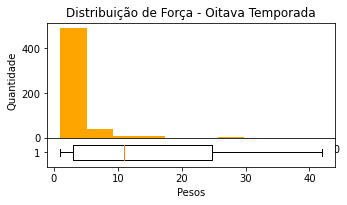

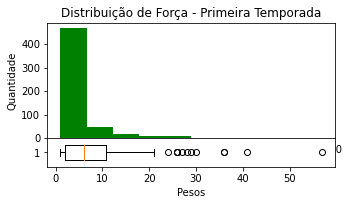

In [120]:


distribuicao_pesos(GrafoTemporada8,"Oitava")
distribuicao_pesos(GrafoTemporada1,"Primeira")

# Distribuição de força - Primeira e oitava temporada

In [111]:
from random import choice 

def colorr():
    cor = choice(["r","blue","salmon","lightcoral","aquamarine","green","grey","orange","indigo"])
    return cor 
    
def distribuicao_forca(temporada,title):
    forcas = sorted([v for k, v in nx.degree(temporada, weight='weight')])
    graus = [grau for vertice, grau in GrafoTemporada1.degree()]
    fig = plt.figure(1, figsize=(4,2))
    ax_hist = plt.axes([0, .2, 1, .8])
    ax_box = plt.axes([0, .0, 1, .2])
    ax_hist.hist(forcas, color=colorr())
    ax_hist.set_title("Distribuição de Força - {} Temporada".format(title))
    ax_hist.set_ylabel("Quantidade")
    ax_box.set_xlabel("Força do Vértice")
    #ax_box.boxplot(graus, widths = .5, vert=False)
    plt.show()
        

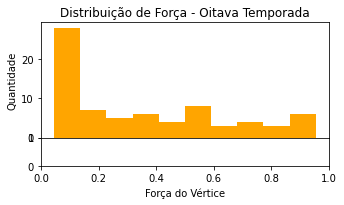

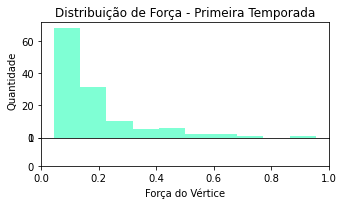

In [112]:
distribuicao_forca(GrafoTemporada8,"Oitava")
distribuicao_forca(GrafoTemporada1,"Primeira")

## Grau médio - Primeira e oitava temporada

In [52]:
# Grau médio da primeira e oitava temporada
def grau_medio_primero_oitava_temp():
    graus_S1 = dict(GrafoTemporada1.degree())
    graus_S1 = list(graus_S1.values())
    grau_medio_S1 = np.mean(graus_S1)
    print("Grau médio da rede S1:", grau_medio_S1)

    graus_S8 = dict(GrafoTemporada8.degree())
    graus_S8 = list(graus_S8.values())
    grau_medio_S8 = np.mean(graus_S8)

    print("Grau médio da rede S8:", grau_medio_S8)
    return grau_medio_S8, grau_medio_S1
    
grau_medio_primero_oitava_temp()    

Grau médio da rede S1: 8.714285714285714
Grau médio da rede S8: 14.945945945945946


(14.945945945945946, 8.714285714285714)

# Visualização do grau médio da primeira e oitava temporada

Grau médio da rede S1: 8.714285714285714
Grau médio da rede S8: 14.945945945945946


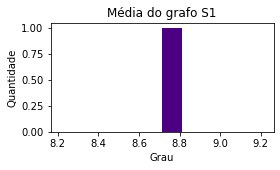

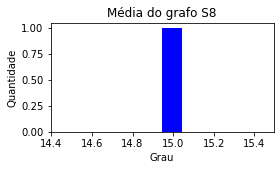

In [121]:
def plot_grau_medio():
    grau_medio_S8, grau_medio_S1 = grau_medio_primero_oitava_temp()    
    fig = plt.figure(1, figsize=(4,2))
    plt.hist(grau_medio_S1, color=colorr())
    plt.title("Média do grafo S1")
    plt.xlabel("Grau")
    plt.ylabel("Quantidade")

    fig = plt.figure(2, figsize=(4,2))
    plt.hist(grau_medio_S8, color=colorr())
    plt.title("Média do grafo S8")
    plt.xlabel("Grau")
    plt.ylabel("Quantidade")

plot_grau_medio()

# Densidade - Primeira e oitava temporada


In [59]:
print("Densidade da rede S1:",  nx.density(GrafoTemporada1))
print("Densidade da rede S8:", nx.density(GrafoTemporada8))


Densidade da rede S1: 0.06971428571428571
Densidade da rede S8: 0.20473898556090336



# Visualização da densidade referente primeira e oitava temporada


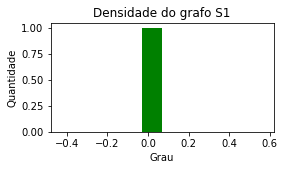

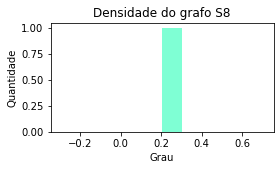

In [122]:
def plot_densidade():
    fig = plt.figure(1, figsize=(4,2))
    plt.hist( nx.density(GrafoTemporada1) , color=colorr())
    plt.title("Densidade do grafo S1")
    plt.xlabel("Grau")
    plt.ylabel("Quantidade")

    fig = plt.figure(2, figsize=(4,2))
    plt.hist( nx.density(GrafoTemporada8), color=colorr())
    plt.title("Densidade do grafo S8")
    plt.xlabel("Grau")
    plt.ylabel("Quantidade")
    
plot_densidade()

## Transitividade - Primeira e oitava temporada


Coeficiente de agrupamento global da rede S1: 0.38325183374083127
Coeficiente de agrupamento global da rede S8: 0.6441837028505615


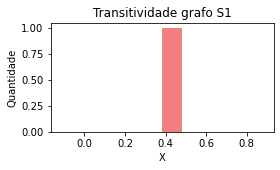

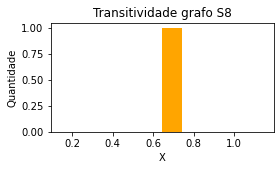

In [123]:
def transitividade_entre_as_temporadas():
    print("Coeficiente de agrupamento global da rede S1:", nx.transitivity(GrafoTemporada1))
    print("Coeficiente de agrupamento global da rede S8:", nx.transitivity(GrafoTemporada8))
    
    fig = plt.figure(1, figsize=(4,2))
    plt.hist(nx.transitivity(GrafoTemporada1), color=colorr())
    plt.title("Transitividade grafo S1")
    plt.xlabel("X")
    plt.ylabel("Quantidade")
    
    fig = plt.figure(2, figsize=(4,2))
    plt.hist(nx.transitivity(GrafoTemporada8), color=colorr())
    plt.title("Transitividade grafo S8")
    plt.xlabel("X")
    plt.ylabel("Quantidade")
    
transitividade_entre_as_temporadas()    

## task - 2
- Para cada uma das redes, identifique quem são os 3 personagens mais centrais de acordo com as medidas de
centralidade de grau, intermediação, proximidade e autovetor. Algum destes personagens é central em ambas as temporadas?

## Primeira temporada - Game of Thrones

In [124]:
def centralidade_season(temporada):
    degree_centrality = nx.centrality.degree_centrality(temporada) # save results in a variable to use again
    x = (sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:4]
    betweenness_centrality = nx.centrality.betweenness_centrality(temporada) # save results in a variable to use again
    y = (sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:3]
    closeness_centrality = nx.centrality.closeness_centrality(temporada) # save results in a variable to use again
    z = (sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))[:3]
    eigenvector_centrality = nx.centrality.eigenvector_centrality(temporada) # save results in a variable to use again
    w = (sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True))[:3]
    
    aux = {"degree_centrality":x,
          "betweenness_centrality":y,
          "closeness_centrality":z,
          "eigenvector_centrality":w}
    return aux



In [125]:
centralidade_season(GrafoTemporada1)

{'degree_centrality': [('NED', 0.456),
  ('TYRION', 0.328),
  ('ROBERT', 0.28800000000000003),
  ('CATELYN', 0.28800000000000003)],
 'betweenness_centrality': [('NED', 0.3032802081478768),
  ('TYRION', 0.16302743524270866),
  ('CATELYN', 0.11828405295282027)],
 'closeness_centrality': [('NED', 0.628140703517588),
  ('ROBERT', 0.5530973451327433),
  ('CATELYN', 0.5506607929515418)],
 'eigenvector_centrality': [('NED', 0.31508201969036415),
  ('ROBERT', 0.24818996690338851),
  ('CERSEI', 0.23926199958075808)]}

## Oitava temporada - Game of Thrones

In [126]:
centralidade_season(GrafoTemporada8)

{'degree_centrality': [('SAM', 0.5753424657534246),
  ('DAENERYS', 0.5616438356164384),
  ('TYRION', 0.5616438356164384),
  ('SANSA', 0.547945205479452)],
 'betweenness_centrality': [('DAENERYS', 0.13390159981644),
  ('SAM', 0.09913291196077363),
  ('ARYA', 0.09902087596468986)],
 'closeness_centrality': [('SAM', 0.6770077894171367),
  ('DAENERYS', 0.670434898257747),
  ('TYRION', 0.670434898257747)],
 'eigenvector_centrality': [('TYRION', 0.21789621436284157),
  ('SAM', 0.21715160565017616),
  ('SANSA', 0.21581251261754122)]}

# Task - 3 
- Execute o mesmo algoritmo de detecção de comunidades (de sua preferência) nas redes das duas temporadas. Apresente o grafo com os vértices coloridos de acordo com as comunidades encontradas e com os nomes dos vértices para
- sua identificação. O número de comunidades é o mesmo em ambos os casos? A partir de uma análise visual, é possível
- identificar uma comunidade similar (em termos de personagens) em ambas as temporadas?

## O número de comunidades é o mesmo em ambos os casos?
- Não, utilizando o algoritmo de louvain a primeira temporada registrou 4 grupos e a oitava temporada 4 grupos conectados e um grupo sem conexão.
- Não, no algoritmo de girvan newman a primeira temporada apresentou 4 grupos e a oitava 4 grupos conectados e 1 não conectado.

## A partir de uma análise visual, é possível identificar uma comunidade similar (em termos de personagens) em ambas as temporadas?
- Sim, por exemplo, na primeira tempora no cluster_id = 0: Ned, Robert e na oitava temporada no cluster_id = 0: Ned, Robert

In [81]:
nx.is_connected(GrafoTemporada1.to_undirected())

True

# Primeira temporada - Algoritmo de louvain - Comunidades

In [86]:
!pip install python-louvain
from community import community_louvain


In [127]:

def algoritmo_louvion_communidades(temporada):
    partitions1 = community_louvain.best_partition(temporada)
    values1 = list(partitions1.values())
    # Visualização geral das comunidades da primeira temporada
    pos = nx.spring_layout(temporada)
    plt.figure(figsize=(10,8))
    plt.axis("off")
    nx.draw_networkx(temporada, pos, width = 0.3, font_color="Black", font_size = 12, cmap=plt.get_cmap("hsv"),
    node_color=values1, node_size=70)
    
    partitionsN0 = community_louvain.best_partition(temporada)
    valuesN0 = list(partitionsN0.values())

    cluster_id = 0
    clusterN0 = [node for node in temporada.nodes() if partitionsN0[node] == cluster_id]
    clusterN0 = GrafoTemporada1.subgraph(clusterN0)
    plt.figure(figsize=(10,8))
    nx.draw_networkx(clusterN0, node_color=colorr(), node_size=70, width = 0.3, font_color="Black", font_size = 20, with_labels = True)
    partitionsN1 = community_louvain.best_partition(temporada)
    valuesN1 = list(partitionsN1.values())
    
    cluster_id = 1
    clusterN1 = [node for node in temporada.nodes() if partitionsN1[node] == cluster_id]
    clusterN1 = temporada.subgraph(clusterN1)
    plt.figure(figsize=(10,8))
    nx.draw_networkx(clusterN1, node_color=colorr(), node_size=70, width = 0.3, font_color="Black", font_size = 13, with_labels = True)
    partitionsN2 = community_louvain.best_partition(temporada)
    valuesN2 = list(partitionsN2.values())

    cluster_id = 2
    clusterN2 = [node for node in temporada.nodes() if partitionsN2[node] == cluster_id]
    clusterN2 = temporada.subgraph(clusterN2)
    plt.figure(figsize=(10,8))
    nx.draw_networkx(clusterN2, node_color=colorr(), node_size=70, width = 0.3, font_color="Black", font_size = 13, with_labels = True)
    partitionsN3 = community_louvain.best_partition(temporada)
    valuesN3 = list(partitionsN3.values())

    cluster_id = 3
    clusterN3 = [node for node in temporada.nodes() if partitionsN3[node] == cluster_id]
    clusterN3 = temporada.subgraph(clusterN3)
    plt.figure(figsize=(10,8))
    nx.draw_networkx(clusterN3, node_color=colorr(), node_size=70, width = 0.3, font_color="Black", font_size = 12, with_labels = True)
    partitionsN4 = community_louvain.best_partition(temporada)
    valuesN4 = list(partitionsN4.values())

    cluster_id = 4
    clusterN4 = [node for node in temporada.nodes() if partitionsN4[node] == cluster_id]
    clusterN4 = temporada.subgraph(clusterN4)
    plt.figure(figsize=(10,8))
    nx.draw_networkx(clusterN4, node_color=colorr(), node_size=70, width = 0.3, font_color="Black", font_size = 12, with_labels = True)

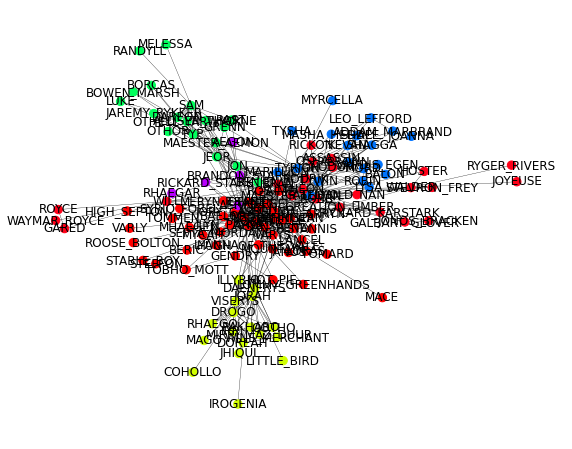

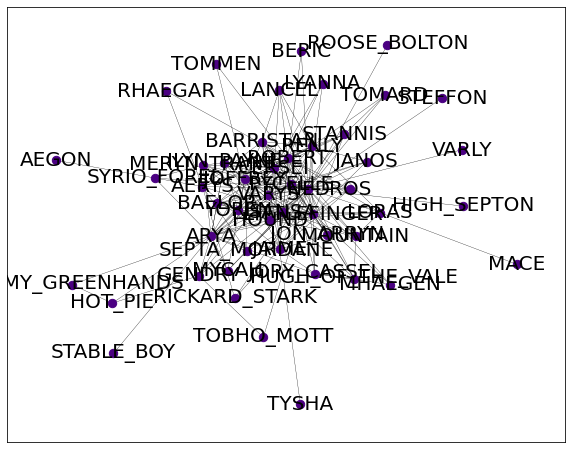

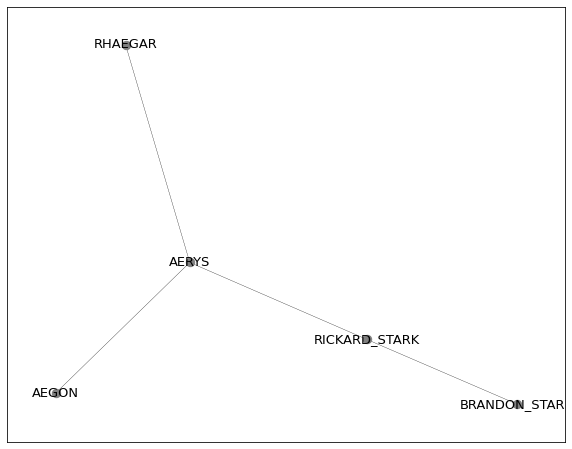

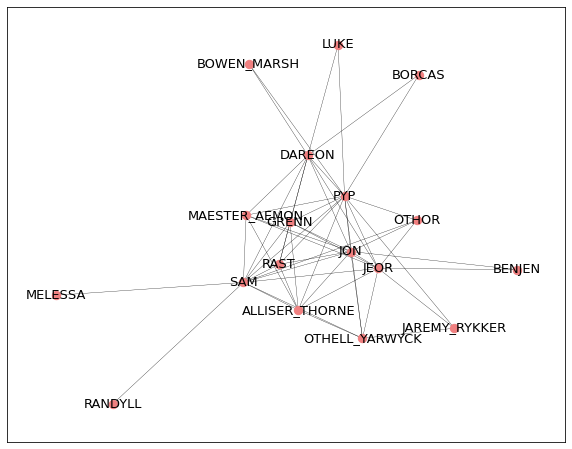

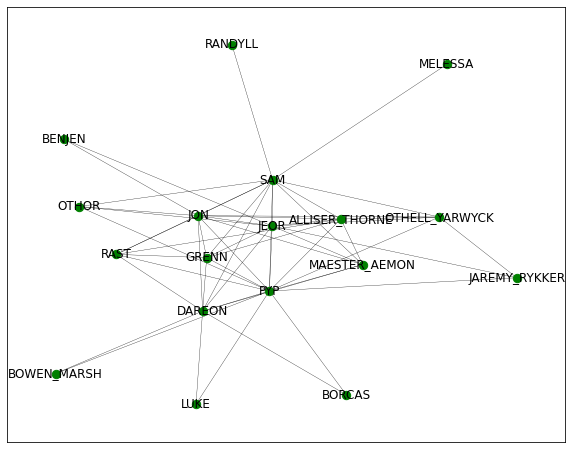

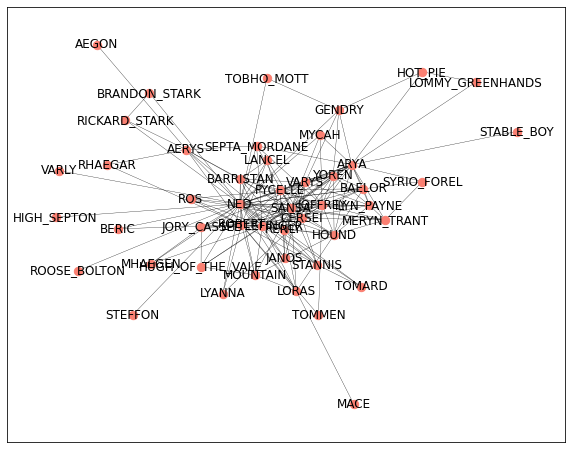

In [128]:
algoritmo_louvion_communidades(GrafoTemporada1)

# Oitava temporada - Algoritmo de louvain
##  Comunidades


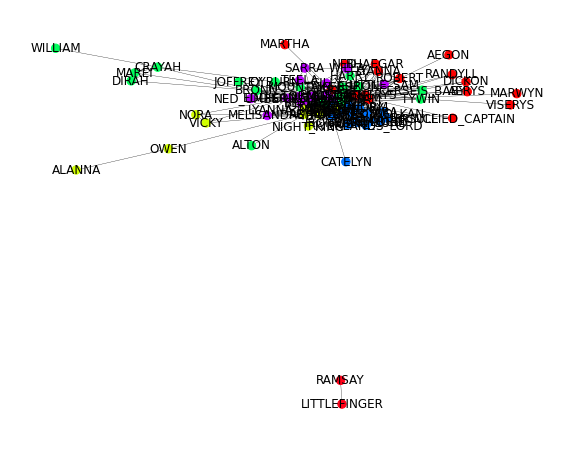

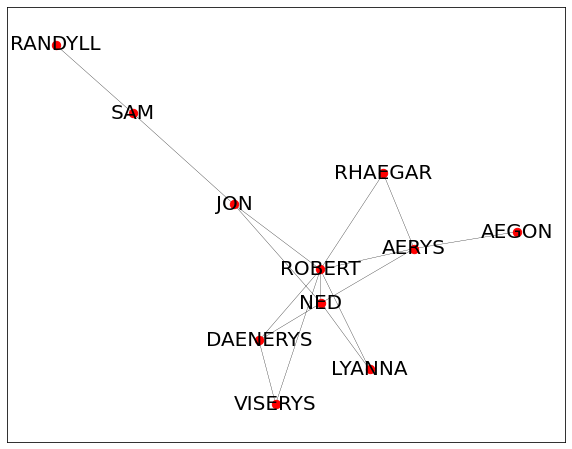

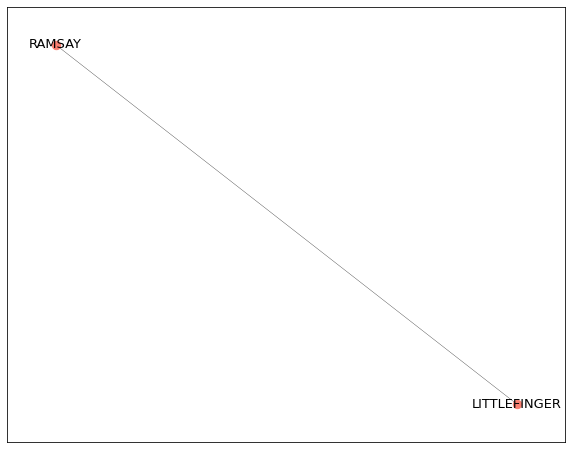

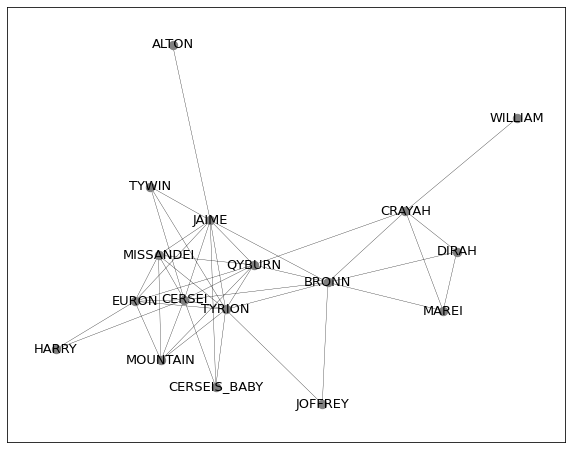

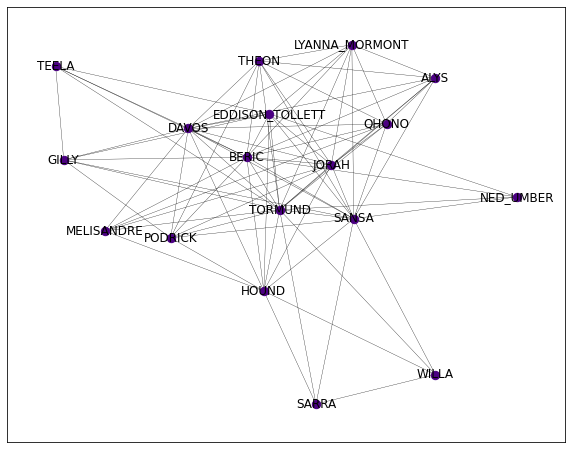

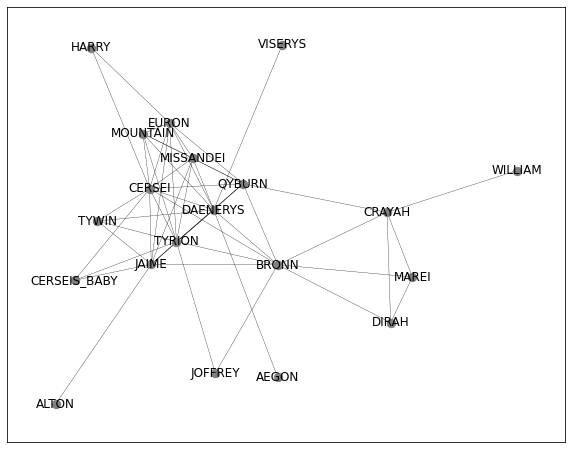

In [129]:
algoritmo_louvion_communidades(GrafoTemporada8)

In [104]:
nx.is_connected(GrafoTemporada8.to_undirected())


False

In [105]:
!pip install cdlib
from cdlib import algorithms, viz


Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'graph_tool', 'leidenalg', 'karateclub', 'wurlitzer'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'karateclub', 'ASLPAw'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'infomap', 'leidenalg', 'wurlitzer'}


# Primeira temporada - algoritmo girvan newman


In [106]:
def algoritmo_girvan_newman_comunidades(temporada):
    print(type(temporada))
    pos1 = nx.spring_layout(temporada)
    comunidades1 = algorithms.girvan_newman(temporada, level=3)
    viz.plot_network_clusters(temporada, comunidades1, pos1, figsize=(13,10))
    viz.plot_community_graph(temporada, comunidades1, figsize=(13,10))


<class 'networkx.classes.graph.Graph'>


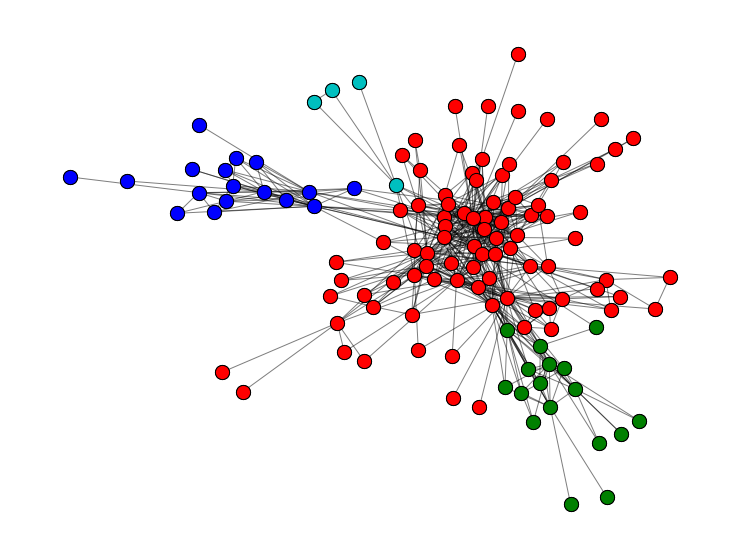

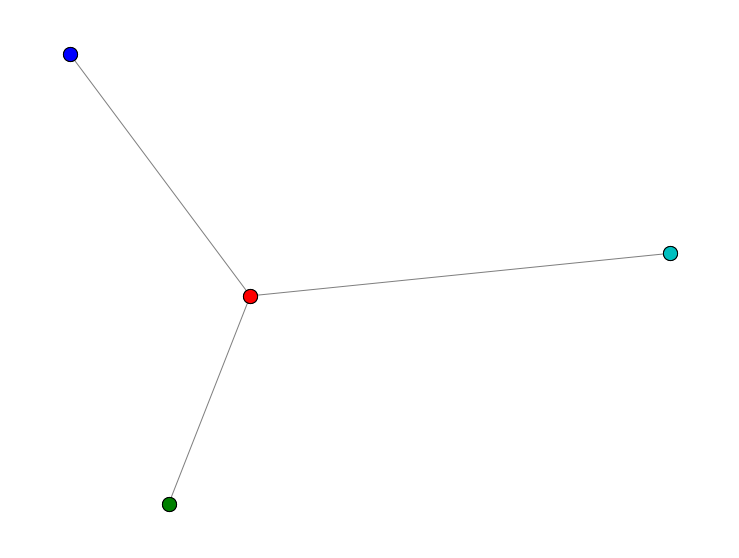

In [107]:
algoritmo_girvan_newman_comunidades(GrafoTemporada1)

# Oitava temporada - algoritmo girvan newman

<class 'networkx.classes.graph.Graph'>


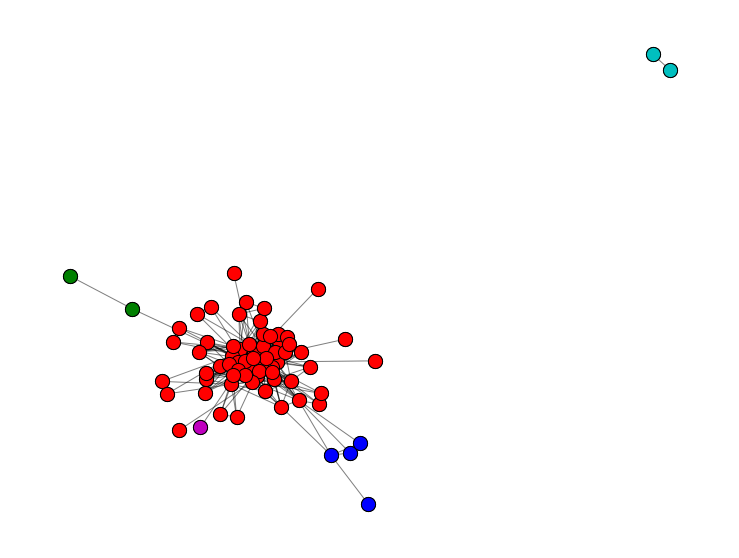

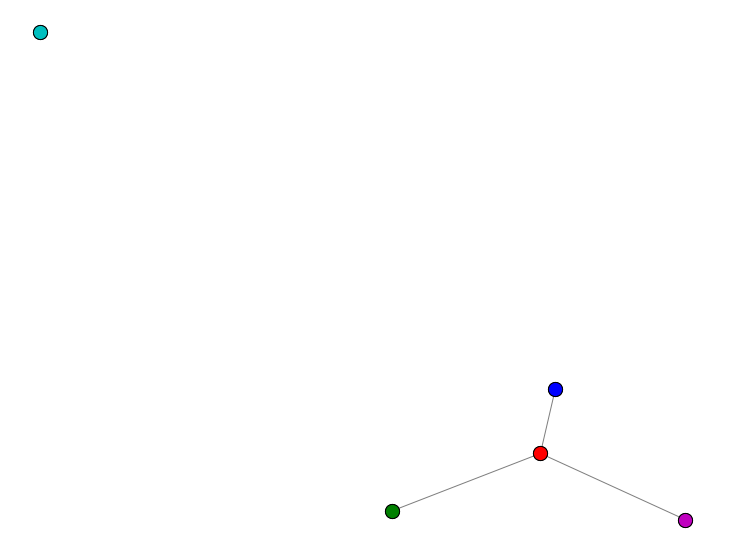

In [108]:
algoritmo_girvan_newman_comunidades(GrafoTemporada8)